<a href="https://colab.research.google.com/github/jmcarbo/onvasbrossa/blob/master/Onvasbrossa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Treball de Recerca: Reconeixement d'Imatges per Classificar Brossa

## Com funciona un quadern interactiu

Aquest apartat us el podeu saltar si ja sabeu com funciona Jupyter Notebooks

Aquest és un quadern de pràctiques interactiu en el que trobareu dos tipus de paràgrafs (**cel·les**): els paràgafs de tipus **text** i els paràgrafs de tipus **programes executables** (*codi*), que contenen instruccions per l'ordinador i estan escrits en el llenguatge de programació *Python*.

Els paràgrafs que contenen **programes** (*codi*) es distingeixen perquè tenen fons gris clar i quan situem el cursor sobre els claudàtors ```[ ]``` de la part superior exquerra es converteix en una icona amb un triangle que podem clicar i fer que s'executi el codi que hi emmagatzemat. Si apareix un número entre els claudàtors, com per exemple ```[3]``` voldrà dir que el paràgraf de codi s'ha executat prèviament durant la sessió actual. El número pròpiament dit indica l'ordre en que s'ha executat respecte de la resta de paràgrafs.

Cal tenir cura perquè tots els **paràgrafs són editables** i si escribim a sobre modificarem el seu contingut. En el cas dels paràgrafs de text cal clicar dos cops per poder-los editar i clicar fora del paràgraf per finalitzar l'edició. En el cas dels paràgrafs de codi es poden editar directament només posant el cursor sobre el paràgraf.

A la part superior esquerra d'aquesta plana trobareu dos botons amb el text **"+ Code"** i **"+ Text"** que us permetran afegir nous paràgrafs de *text* o *codi* just a sota del paràgraf on tingueu el cursor.

Podeu guardar-vos una còpia d'aquest quadern de pràctiques anant al menú de la capçalera de la pàgina i seleccionant "File" i a continuació en el desplegable escollir **"Save a copy in drive"** (us guradarà una còpia en el vostre Google Drive) o bé seleccionar l'opció **"Download .ipynb"** i us guardarà una còpia en el vostre ordinador local. Si escolliu l'opció Google Drive podreu anar salvant a demanda una còpia actualitzada només sel·lecionat l'opció **"save"**.

## Objectius

Ara que ja he provat que funciona el programa de classificació de imatges de flors, m'inspiraré en el tutorial per el meu propi programa de classificació de residuus domèstics.

## Biblioteques de funcions Python emprades

Ha arribat el moment de començar a explorar les imatges però primer les hem de tenir a ma i per això haurem de donar-li instruccions a l'ordinador de com fer-ho.

El primer que haurem de fer es dir-li quines biblioteques de programes volem fer servir. Una biblioteca de programa és un conjunt d'instruccions que han escrit prèviament altres persones i que ens faciliten a nosaltres la feina perquè contenen conjunts d'instruccions que fan accions complexes que, d'altra manera, hauriem de escriure nosaltres desde zero.

Com a primer pas executarem el paràgraf de codi que ve a continuació i que li indica a l'ordinador quines biblioteques volem fer servir. La **instrucció** `import` indica que incorpori una biblioteca de funcions.

Premeu doncs sobre el triangle d'execució del paràgraf següent per executar el codi. Heu d'observar que la icona simula que gira i que finalment apareix un número dins dels claudàtors o bé el número que ja hi havia s'incrementa. Això ens indicarà que l'ordinador ja ha processat les instruccions que li hem donat.

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import pathlib
import random

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import preprocessing
from tensorflow.keras.models import Sequential

## Imatges a processar

Descarreguem les imatges que s'han capturat i que serviran per l'ensinistrament i la validació, per fer-ho les clonem del repositori git "github.com/jmcarbo/onvasbrossa"

In [1]:
!git clone https://github.com/jmcarbo/onvasbrossa.git

Cloning into 'onvasbrossa'...
remote: Enumerating objects: 196, done.
remote: Total 196 (delta 0), reused 0 (delta 0), pack-reused 196
Receiving objects: 100% (196/196), 406.87 MiB | 36.60 MiB/s, done.
Checking out files: 100% (209/209), done.


Assignarem la carpeta on han quedat descarregades les imatges a la variable `data_dir`

In [4]:
data_dir=pathlib.Path("./onvasbrossa/img")

Ara comptem quantes imatges tenim

In [5]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

185


Inclús podem mostrar una imatge de aleatòria de tipus orgànic.

Cada cop que executeu el codi del paràgraf següent obtindreu una imatge aleatòria.

Organic  -  onvasbrossa/img/Organic/IMG-20200907-WA0004.jpg


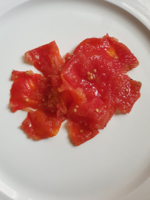

In [6]:
Classes = ['Envasos', 'Organic', 'Paper', 'Vidre']
random_class = Classes[random.randint(0, len(Classes)-1)]
ImageNames = list(data_dir.glob(random_class + '/*'))
image_name = str(ImageNames[random.randint(0, len(ImageNames)-1)])
im=PIL.Image.open(image_name)
size=200,200
im.thumbnail(size)
print(random_class, " - ", image_name)
im

## Creació del model

A continuació seleccionem les imatges que serviran per crear el model i les que serviran per validar-lo

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)



Found 208 files belonging to 4 classes.
Using 167 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 208 files belonging to 4 classes.
Using 41 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['Envasos', 'Organic', 'Paper', 'Vidre']


In [ ]:
for images, labels in train_ds.take(1):
  print(len(images))

32


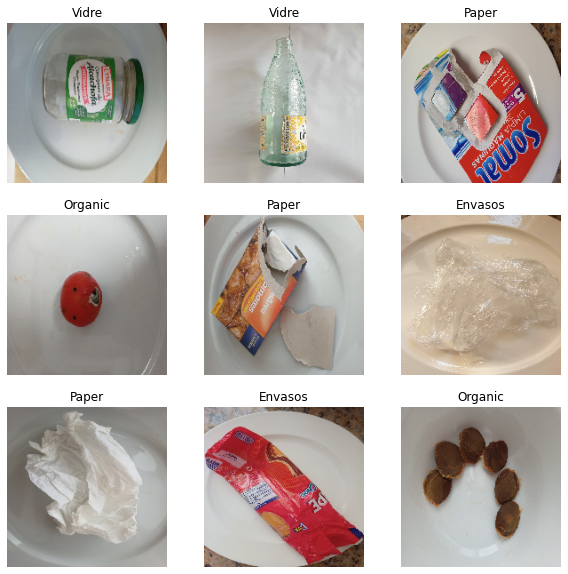

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.046156887 0.9058824


In [ ]:
num_classes = 5

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0

In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
6/6 [==============================] - 9s 1s/step - loss: 2.3811 - accuracy: 0.2456 - val_loss: 1.4685 - val_accuracy: 0.2927
Epoch 2/10
6/6 [==============================] - 5s 778ms/step - loss: 1.3183 - accuracy: 0.2659 - val_loss: 1.3539 - val_accuracy: 0.2927
Epoch 3/10
6/6 [==============================] - 5s 765ms/step - loss: 1.2316 - accuracy: 0.4841 - val_loss: 1.2918 - val_accuracy: 0.5854
Epoch 4/10
6/6 [==============================] - 5s 901ms/step - loss: 1.0137 - accuracy: 0.5513 - val_loss: 1.2568 - val_accuracy: 0.4878
Epoch 5/10
6/6 [==============================] - 5s 775ms/step - loss: 0.9178 - accuracy: 0.5776 - val_loss: 1.0268 - val_accuracy: 0.6829
Epoch 6/10
6/6 [==============================] - 5s 784ms/step - loss: 0.7736 - accuracy: 0.6557 - val_loss: 1.0901 - val_accuracy: 0.5854
Epoch 7/10
6/6 [==============================] - 5s 937ms/step - loss: 0.5675 - accuracy: 0.7593 - val_loss: 0.9159 - val_accuracy: 0.6829
Epoch 8/10
6/6 [=======

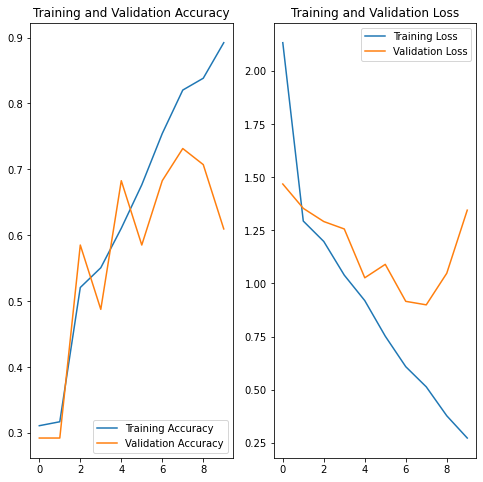

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

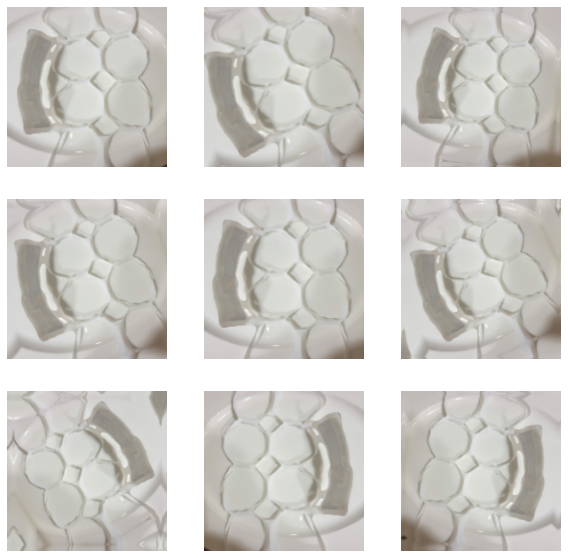

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_2 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 45, 45, 64)       

In [ ]:
epochs = 10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
6/6 [==============================] - 6s 923ms/step - loss: 2.0516 - accuracy: 0.2276 - val_loss: 1.3599 - val_accuracy: 0.2927
Epoch 2/10
6/6 [==============================] - 6s 1s/step - loss: 1.3536 - accuracy: 0.4293 - val_loss: 1.3702 - val_accuracy: 0.2927
Epoch 3/10
6/6 [==============================] - 6s 1s/step - loss: 1.1918 - accuracy: 0.4626 - val_loss: 1.3504 - val_accuracy: 0.4878
Epoch 4/10
6/6 [==============================] - 6s 936ms/step - loss: 1.2471 - accuracy: 0.3718 - val_loss: 1.4504 - val_accuracy: 0.2927
Epoch 5/10
6/6 [==============================] - 6s 935ms/step - loss: 1.2014 - accuracy: 0.4461 - val_loss: 1.2965 - val_accuracy: 0.3659
Epoch 6/10
6/6 [==============================] - 6s 1s/step - loss: 1.1410 - accuracy: 0.5229 - val_loss: 1.2499 - val_accuracy: 0.5122
Epoch 7/10
6/6 [==============================] - 6s 940ms/step - loss: 1.1089 - accuracy: 0.5528 - val_loss: 1.3401 - val_accuracy: 0.3415
Epoch 8/10
6/6 [=============

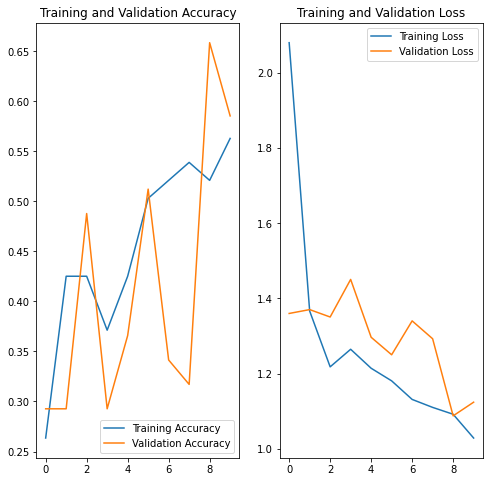

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Com classificar una imatge?

<IPython.core.display.Javascript object>

Saved to photo.jpg


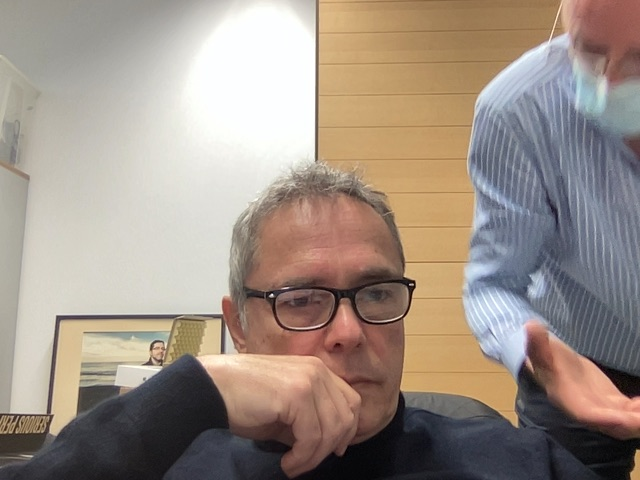

In [ ]:
#@title Captura una imatge
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
#@title Codi per la captura d'imatges via webcam
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
img = keras.preprocessing.image.load_img(
    "photo.jpg", target_size=(img_height, img_width)
)

In [ ]:
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

NameError: ignored

In [ ]:
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

